In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\clean_.csv')
df = df[["Code_produit", "Secteur", "Ingrédient"]]
df.head()

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,lait_ecreme_reconstitue
1,450,Produits laitiers et desserts frais,sucre
2,450,Produits laitiers et desserts frais,fruit
3,450,Produits laitiers et desserts frais,creme
4,450,Produits laitiers et desserts frais,epaississants


In [5]:
df_new = df.groupby(['Code_produit', 'Secteur'])['Ingrédient'].agg(lambda col: ' '.join(col)).reset_index(name='Ingrédient')

from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(token_pattern='\\b(\\w+[\\.,%_1234567890:()]?\\w+)\\b')
count_matrix = coun_vect.fit_transform(df_new['Ingrédient'])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df_new[["Code_produit", "Secteur"]], df_vect], axis=1)
new_df = new_df.drop(['_ananas', '_b1,_b9', '_b1,_b9_et_provitamine_a', '_b12', '_caillettes_de_boeuf_en_proportions_naturelles', '_carotte,_potiron_et_spiruline', '_d_avoine,_de_riz_et_d_epeautre', '_d_orge_et_de_riz', '_de_cassis_et_de_mure', '_de_cuivre', '_de_cuivre_et_de_manganese', '_de_matiere_grasse', '_de_matieres_grasses_au_lait_demi_ecreme_pasteurise', '_de_mg', '_de_thym,_de_laurier', '_e', '_gr', '_lb.rhamnosus', '_maigre_de_tete,_viande_et_couenne_de_porc', '_mg', '_paprika', '_provitamine_a', '_rooibos_et_du_melange_de_13_plantes_ricola', '_tournesol', '_vanille'], axis=1)

In [7]:
new_df.head()
y = new_df[["Secteur"]]
df_features = new_df.drop(["Code_produit", "Secteur"], axis=1)
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

In [8]:
new_df.head()

,Code_produit,Secteur,3_poivres,abondance_aop,abricot,abricot_de_provence,abricot_deshydrate,abricot_lyophilise,abricot_nectarine,abricot_orange,...,zestes_d_orange,zestes_d_oranges,zestes_de_citron,zestes_de_citron_deshydrates,zestes_de_citron_jaune,zestes_de_citron_vert,zestes_de_citrons,zestes_de_mandarine,zinc,zygochlamys_patagonica
0,450,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,453,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,455,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,456,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,460,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df=2)
bag_of_words = count_vectorizer.fit_transform(df['Ingrédient'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

MemoryError: Unable to allocate 137. GiB for an array with shape (1436423, 12801) and data type int64

In [6]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df['Ingrédient'])
count_array = count_matrix.toarray()
df5 = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())

In [7]:
df5

,3_poivres,5_epices,5g_de_matiere_grasse_par_litre,5g_l_mg,7_g_l_mg,_a_teneur_elevee_en_dha,_abricot,_ail,_alpina,_ananas,...,zestes_d_oranges,zestes_d_oranges_haches,zestes_de_citron,zestes_de_citron_jaune,zestes_de_citron_marines,zestes_de_citron_vert,zestes_de_citrons,zestes_de_mandarine,zinc,zygochlamys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
mlc = MultiLabelCounter()
mlc.fit_transform(df['Ingrédient'])
mlc.classes_

NameError: name 'MultiLabelCounter' is not defined

In [108]:
vectorizerCount = CountVectorizer(stop_words=[','])
allDataVectorized = pd.DataFrame(vectorizerCount.fit_transform(df2['Ingrédient']))

In [9]:
new_df = pd.concat([df[["Code_produit", "Secteur"]], df5], axis=1)

In [10]:
new_df

,Code_produit,Secteur,3_poivres,5_epices,5g_de_matiere_grasse_par_litre,5g_l_mg,7_g_l_mg,_a_teneur_elevee_en_dha,_abricot,_ail,...,zestes_d_oranges,zestes_d_oranges_haches,zestes_de_citron,zestes_de_citron_jaune,zestes_de_citron_marines,zestes_de_citron_vert,zestes_de_citrons,zestes_de_mandarine,zinc,zygochlamys
0,450,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,453,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,455,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,456,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,460,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,72338,Compotes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,72339,Compotes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,72340,Compotes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,72341,Compotes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y = new_df["Secteur"]
df_features = new_df.drop(["Code_produit", "Secteur"], axis=1)

In [17]:
X

,3_poivres,5_epices,5g_de_matiere_grasse_par_litre,5g_l_mg,7_g_l_mg,_a_teneur_elevee_en_dha,_abricot,_ail,_alpina,_ananas,...,zestes_d_oranges,zestes_d_oranges_haches,zestes_de_citron,zestes_de_citron_jaune,zestes_de_citron_marines,zestes_de_citron_vert,zestes_de_citrons,zestes_de_mandarine,zinc,zygochlamys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

In [9]:
y_train

,Secteur
40933,Plats cuisines surgeles
54537,Snacking surgele
8040,Sirops et boissons concentrees a diluer
13373,Produits traiteurs frais
45089,Bouillons et potages
...,...
62570,Plats cuisines surgeles
38158,Glaces et sorbets
860,Produits laitiers et desserts frais
15795,Biscuits et gateaux industriels


In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
forest=RFC(n_estimators=10,max_features=10)
forest.fit(X_train,y_train)
output=forest.predict(X_test)
metrics.accuracy_score(y_test, output)

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\3189303817.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


0.9014408338442673

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

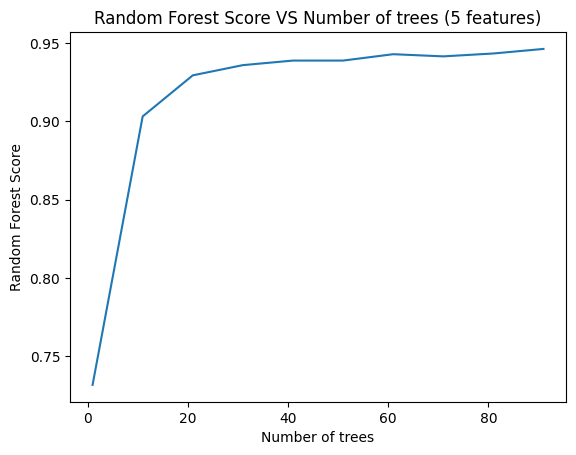

In [11]:
import matplotlib.pyplot as plt
opt_table_estimators=list()
n_features=5
n_estimators=100
for i in range(1,n_estimators,10):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,n_estimators,10), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [12]:
opt_table_estimators

[0.7317596566523605,
 0.9031269160024524,
 0.9293378295524218,
 0.9358522378908645,
 0.9387645616186389,
 0.9387645616186389,
 0.9428264868179032,
 0.9414469650521152,
 0.9432863274064991,
 0.9461986511342735]

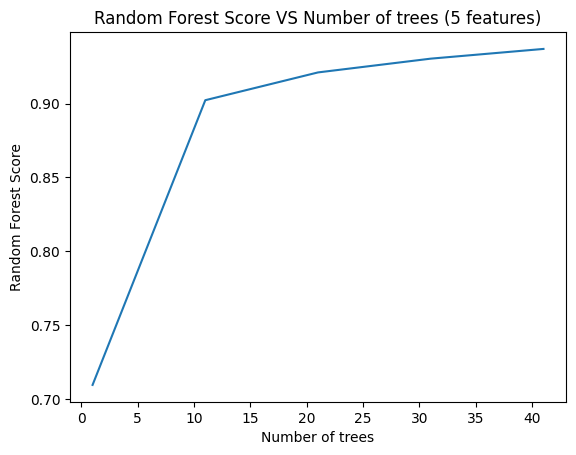

In [27]:
plt.plot(range(1,n_estimators,10), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\50893581.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\50893581.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\50893581.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\50893581.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

ValueError: x and y must have same first dimension, but have shapes (10,) and (7,)

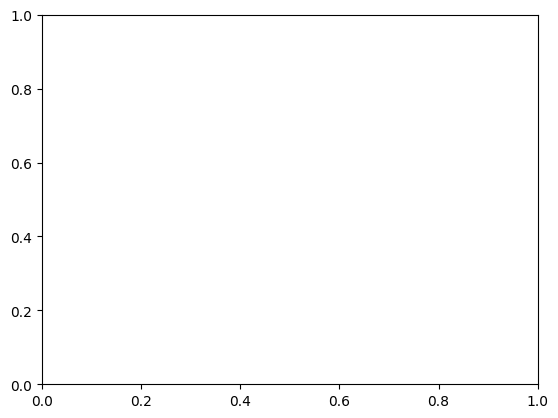

In [15]:
opt_table_n_features=list()
n_estimators= 15
n_features=100
for i in range(1,n_features, 15):
    forest=RFC(n_estimators=n_estimators,max_features=i)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_n_features.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,n_features,15), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show()

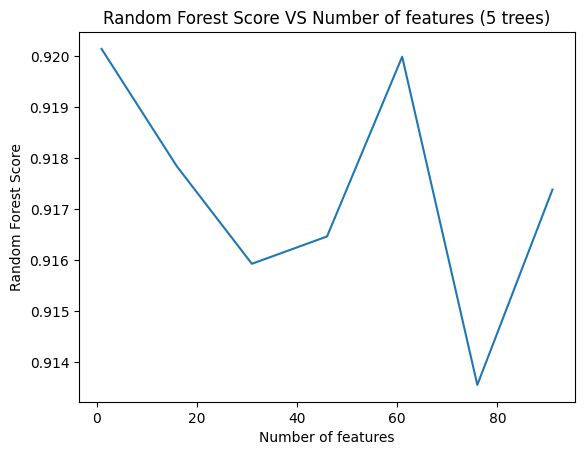

In [16]:
plt.plot(range(1,n_features,15), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show()

In [17]:


forest=RFC(n_estimators=500,max_features=5)
forest.fit(X_train,y_train)
output=forest.predict(X_test)
metrics.accuracy_score(y_test, output)



C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_7036\1566277737.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


0.9478847332924586

In [53]:


forest=RFC(n_estimators=2,max_features=5)
forest.fit(X_train,y_train)
output=forest.predict(X_test)
metrics.accuracy_score(y_test, output)

0.7044832306639288

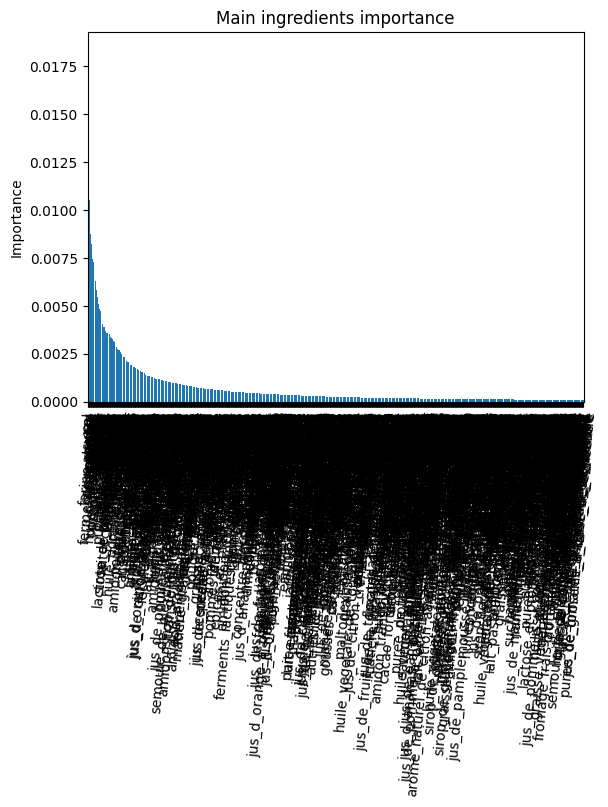

In [25]:
import numpy as np

importance = forest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.0001,:]
x = np.arange(len(importance_plot.index.values))
y = importance_plot.iloc[:, 0]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

In [38]:
y_train.values

array(['Snacking surgele', 'Plats cuisines ambiants',
       'Boissons Rafraichissantes Sans Alcool', ...,
       'Plats cuisines ambiants', 'Plats cuisines ambiants',
       'Jus et nectars'], dtype=object)

In [43]:
df_features.columns.values

array(['3_poivres', '5_epices', '5g_de_matiere_grasse_par_litre', ...,
       'zestes_de_mandarine', 'zinc', 'zygochlamys'], dtype=object)

In [54]:
# Import `tree` module
from sklearn import tree

features = df_features.columns.values # The name of each column
classes = y_train.values # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in forest.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

DecisionTreeClassifier(max_features=5, random_state=1031697666)


KeyboardInterrupt: 

In [79]:
vectorizerCount.fit_transform(df[['Ingrédient']])

<1x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [110]:
allDataVectorized

,0
0,"(0, 2092)\t2\n (0, 1369)\t1\n (0, 3046)\t1..."
1,"(0, 2092)\t2\n (0, 1369)\t1\n (0, 3374)\t1..."
2,"(0, 2092)\t2\n (0, 3374)\t1\n (0, 1662)\t2..."
3,"(0, 2092)\t2\n (0, 3374)\t1\n (0, 1437)\t1..."
4,"(0, 2092)\t1\n (0, 1369)\t1\n (0, 918)\t1\..."
...,...
46745,"(0, 3374)\t1\n (0, 1163)\t1\n (0, 2985)\t1..."
46746,"(0, 3374)\t1\n (0, 1163)\t3\n (0, 2985)\t3..."
46747,"(0, 3374)\t1\n (0, 1163)\t2\n (0, 2985)\t2..."
46748,"(0, 3374)\t1\n (0, 1163)\t1\n (0, 2985)\t2..."


In [180]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,"lait ecreme reconstitue, sucre, fruit, creme, ..."
1,453,Produits laitiers et desserts frais,"yaourt au lait partiellement ecreme, sucre, si..."
2,455,Produits laitiers et desserts frais,"yaourt au lait 1,1% mg, sucre, fruits, fruit, ..."
3,456,Produits laitiers et desserts frais,"yaourt au lait 1,1% mg, sucre, fraise, fructos..."
4,460,Produits laitiers et desserts frais,"lait ecreme pasteurise, creme pasteurisee, fer..."
...,...,...,...
46745,72338,Compotes,"puree de pommes, sucre, antioxydant"
46746,72339,Compotes,"puree de pommes, puree de fraises, sucre, pure..."
46747,72340,Compotes,"puree de pommes, puree de poires, sucre, antio..."
46748,72341,Compotes,"puree de pommes, puree d_abricots, sucre, anti..."


In [212]:
import shlex
# Instantiating the Vectorizer, experimenting with both
vectorizer = CountVectorizer(binary=True, tokenizer=shlex.split)
#vectorizer = TfidfVectorizer()

In [213]:
x = vectorizer.fit_transform(df["Ingrédient"])
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [214]:
df_wrds

,"(cabillaud,,","(lait,",",",0%,"0%mg,","0,","0,2%","0,4%","0,9%","00,",...,"yuzu,",zeste,"zeste,",zestes,"zestes,",zinc,"zinc,",zygochlamis,zygochlamys,"zygochlamys,"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df_wrds

,"0,2","0,4","0,9",00,"1,1","1,3","1,4",10,"10,",100,...,yakitori,yaourt,yoghourt,yogourt,yuzu,zeste,zestes,zinc,zygochlamis,zygochlamys
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(df['Ingrédient'])

In [40]:
a = bag_of_words.columns

In [41]:
print(a)

Index(['00', '10', '100', '11', '110', '11g', '11g_l', '14', '14g_l', '15',
       ...
       'yakitori', 'yaourt', 'yoghourt', 'yogourt', 'yuzu', 'zeste', 'zestes',
       'zinc', 'zygochlamis', 'zygochlamys'],
      dtype='object', length=3693)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",
                             ngram_range = (1,1), # unigrams
                             binary = True, #  (the default is counts)
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = ',',  
                             max_df = 0.99) # any word appearing in more than 99% of the sample will be discarded

In [16]:
vectorizer = CountVectorizer(stop_words=',')

In [27]:
X = vectorizer.transform(df['Ingrédient'])

NotFittedError: Vocabulary not fitted or provided

In [10]:
a

<46750x3693 sparse matrix of type '<class 'numpy.int64'>'
	with 1189027 stored elements in Compressed Sparse Row format>

In [22]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,"{lait ecreme reconstitue, sucre, fruit, creme,..."
1,453,Produits laitiers et desserts frais,"{yaourt au lait partiellement ecreme, sucre, s..."
2,455,Produits laitiers et desserts frais,"{yaourt au lait 1,1% mg, sucre, fruits, fruit,..."
3,456,Produits laitiers et desserts frais,"{yaourt au lait 1,1% mg, sucre, fraise, fructo..."
4,460,Produits laitiers et desserts frais,"{lait ecreme pasteurise, creme pasteurisee, fe..."
...,...,...,...
46745,72338,Compotes,"{puree de pommes, sucre, antioxydant}"
46746,72339,Compotes,"{puree de pommes, puree de fraises, sucre, pur..."
46747,72340,Compotes,"{puree de pommes, puree de poires, sucre, anti..."
46748,72341,Compotes,"{puree de pommes, puree d_abricots, sucre, ant..."
